# Import Data

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from wordcloud import WordCloud
pd.options.display.max_columns = 30

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
%cd /content/drive/MyDrive/Data Analysis/1-Movies Dataset/

/content/drive/MyDrive/Data Analysis/1-Movies Dataset


In [126]:
df = pd.read_csv("movies_complete.csv", parse_dates=["release_date"])

In [127]:
df.head(5)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,diretor
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//rhIR...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vzmL...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//6ksm...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//16XO...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//e64s...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


# EDA

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44704 entries, 0 to 44703
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44704 non-null  int64         
 1   title                  44704 non-null  object        
 2   tagline                20290 non-null  object        
 3   release_date           44670 non-null  datetime64[ns]
 4   genres                 42599 non-null  object        
 5   belongs_to_collection  4465 non-null   object        
 6   original_language      44694 non-null  object        
 7   budget_musd            8863 non-null   float64       
 8   revenue_musd           7392 non-null   float64       
 9   production_companies   33367 non-null  object        
 10  production_countries   38848 non-null  object        
 11  vote_count             44704 non-null  float64       
 12  vote_average           42089 non-null  float64       
 13  p

Features:
* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [122]:
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44704.00,8863.00,7392.00,44704.00,42089.00,44704.00,43192.00,44704.00,44704.00
mean,107170.24,21.66,68.93,111.64,6.00,2.96,97.57,12.48,10.32
std,111796.63,34.35,146.55,495.25,1.28,6.04,34.65,12.12,15.89
min,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,26026.50,2.00,2.41,3.00,5.30,0.40,86.00,6.00,2.00
50%,59109.00,8.20,16.88,10.00,6.10,1.15,95.00,10.00,6.00
75%,154192.75,25.00,67.63,35.00,6.80,3.77,107.00,15.00,12.00
max,469172.00,380.00,2787.97,14075.00,10.00,547.49,1256.00,313.00,435.00


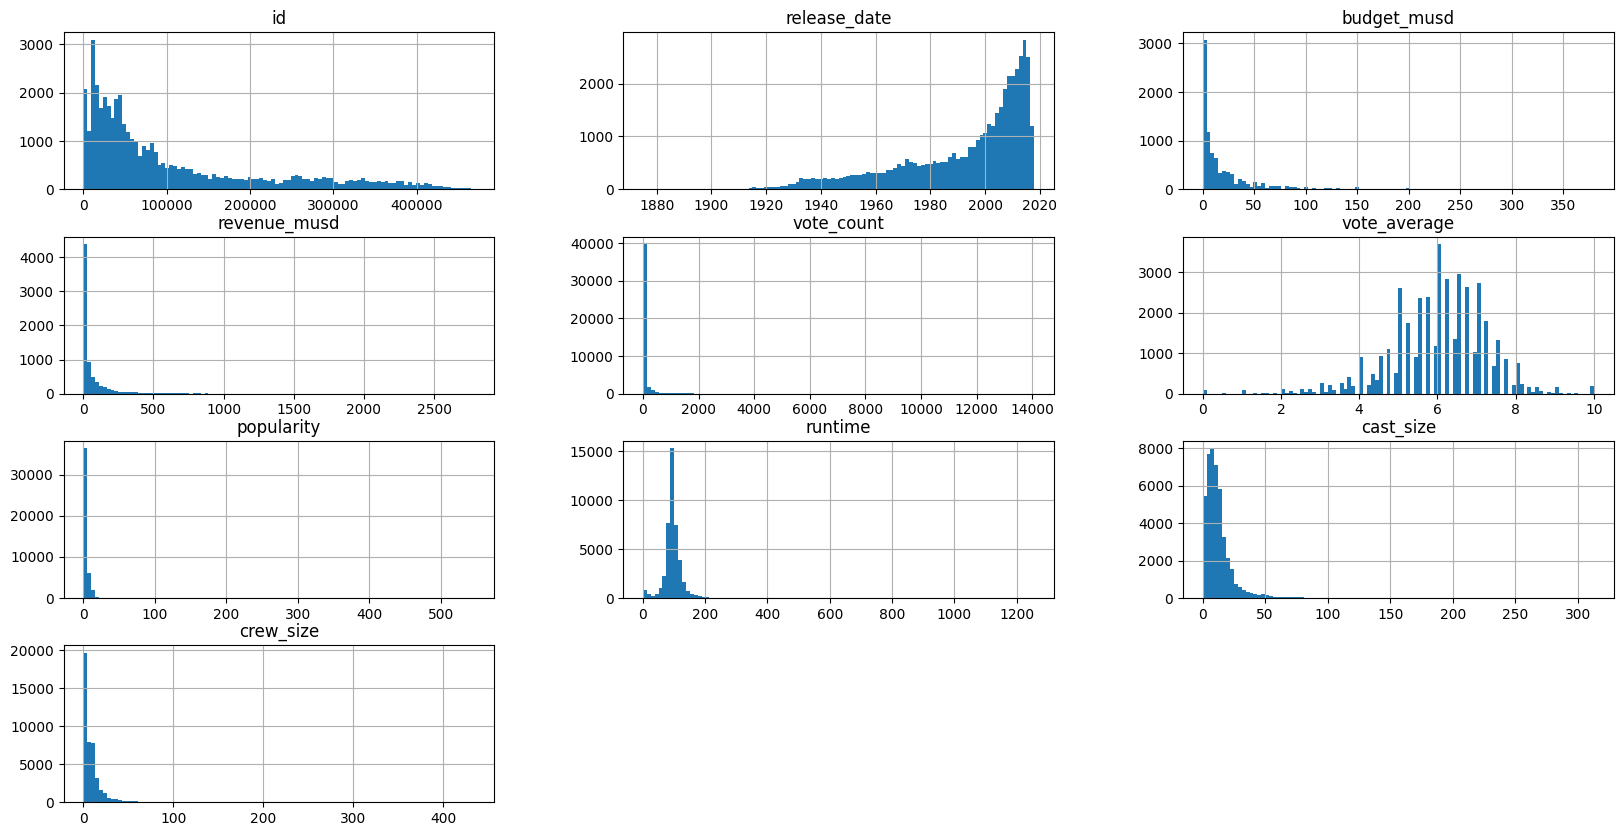

In [31]:
# plot histogram for all columns
df.hist(figsize=(20, 10), bins=100)
plt.show()

In [32]:
# check value counts for subset of columns
columns = ["budget_musd", "revenue_musd", "vote_count", "vote_average"]

for col in columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts(dropna = False).head(20))
    print("=" * 30)

Value counts for column 'budget_musd':
NaN      35841
5.00       286
10.00      259
20.00      243
2.00       241
15.00      226
3.00       220
25.00      206
1.00       195
30.00      190
4.00       180
6.00       173
12.00      171
40.00      167
8.00       155
35.00      141
0.50       141
7.00       137
50.00      124
1.50       119
Name: budget_musd, dtype: int64
Value counts for column 'revenue_musd':
NaN      37312
12.00       20
11.00       19
10.00       19
2.00        18
6.00        17
5.00        14
0.50        13
8.00        13
14.00       12
0.00        12
7.00        11
1.00        10
3.00        10
20.00       10
4.00         9
0.00         9
1.50         9
15.00        8
30.00        8
Name: revenue_musd, dtype: int64
Value counts for column 'vote_count':
1.00     3186
2.00     3056
3.00     2730
0.00     2615
4.00     2442
5.00     2066
6.00     1724
7.00     1555
8.00     1333
9.00     1179
10.00    1156
11.00     933
12.00     850
13.00     725
14.00     697
15.00   

In [33]:
# summary statistics on non-numerical columns
df.describe(include = 'O')
# count is 4404 & 41605 unique only that means we have duplicates
# 11 duplicated movies with title 'Cindrella'

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,diretor
count,44704,20290,42599,4465,44694,33367,38848,43753,41107,44480,42515,43973
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44442,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//5D7U...,Georges Méliès,John Ford
freq,11,7,4938,29,31763,741,17729,3,22196,5,24,66


In [34]:
# check duplicates of 'Cinderella' movie if they are real or not
df[df["title"] == 'Cinderella']
# they are not real duplicates because they have different release dates with same titles

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,diretor
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.90,263.59,RKO Radio Pictures|Walt Disney Productions,United States of America,1760.00,6.80,14.44,74.00,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//cdf4...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
12989,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,NaN,NaN,Walt Disney Television|Citadel Entertainment|S...,United States of America,28.00,6.10,2.10,88.00,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//s5d5...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
23260,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,NaN,NaN,NaN,United States of America,7.00,5.40,0.36,52.00,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//2cLf...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
23271,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,NaN,NaN,GoodTimes Entertainment,Japan|United States of America,2.00,6.00,2.15,48.00,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28081,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,NaN,NaN,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,Italy,9.00,5.30,0.99,180.00,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//yKLF...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
28348,150689,Cinderella,Midnight is just the beginning.,2015-03-12,Romance|Fantasy|Family|Drama,NaN,en,95.00,543.51,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,United Kingdom|United States of America,2426.00,6.70,19.80,105.00,"When her father unexpectedly passes away, youn...",English,<img src='http://image.tmdb.org/t/p/w185//o1F2...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh
33816,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,NaN,NaN,Lenfilm,Russia,5.00,4.80,0.49,80.00,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//nLRn...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
35125,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,NaN,NaN,NaN,United States of America,5.00,5.90,0.21,77.00,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//4Tjz...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
35127,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,NaN,NaN,NaN,NaN,5.00,5.60,1.09,90.00,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//fstw...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
40450,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,NaN,NaN,Star-Film|Georges Méliès,France,19.00,5.50,1.30,5.00,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//vtYk...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès


**Creating best movies in terms of budget, revenue, vote**

In [35]:
# creating a copy named best movies
df_best = df[["poster_path", "title", "budget_musd", "revenue_musd",
              "vote_count", "vote_average", "popularity"]].copy()
df_best

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//rhIR...,Toy Story,30.00,373.55,5415.00,7.70,21.95
1,<img src='http://image.tmdb.org/t/p/w185//vzmL...,Jumanji,65.00,262.80,2413.00,6.90,17.02
2,<img src='http://image.tmdb.org/t/p/w185//6ksm...,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71
3,<img src='http://image.tmdb.org/t/p/w185//16XO...,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86
4,<img src='http://image.tmdb.org/t/p/w185//e64s...,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39
...,...,...,...,...,...,...,...
44699,<img src='http://image.tmdb.org/t/p/w185//jlds...,Subdue,NaN,NaN,1.00,4.00,0.07
44700,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Century of Birthing,NaN,NaN,3.00,9.00,0.18
44701,<img src='http://image.tmdb.org/t/p/w185//d5bX...,Betrayal,NaN,NaN,6.00,3.80,0.90
44702,<img src='http://image.tmdb.org/t/p/w185//aorB...,Satan Triumphant,NaN,NaN,0.00,NaN,0.00


In [36]:
# creating profit & return on investment columns
df_best["profit_musd"] = df["revenue_musd"] - df["budget_musd"]
df_best["return"] = df["revenue_musd"] / df["budget_musd"]

In [37]:
df_best.head()

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,return
0,<img src='http://image.tmdb.org/t/p/w185//rhIR...,Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vzmL...,Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//6ksm...,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//16XO...,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//e64s...,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39,NaN,NaN


In [38]:
# rename columns for data representation
df_best.columns = ["", "Title", "Budget", "Revenue", "Votes", "Average Rating", "Popularity", "Profit", "ROI"]

In [39]:
# seting title to be the index
df_best.set_index("Title", inplace = True)

In [40]:
df_best.head(10)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//rhIR...,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vzmL...,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//6ksm...,NaN,NaN,92.00,6.50,11.71,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//16XO...,16.00,81.45,34.00,6.10,3.86,65.45,5.09
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//e64s...,NaN,76.58,173.00,5.70,8.39,NaN,NaN
Heat,<img src='http://image.tmdb.org/t/p/w185//zMyf...,60.00,187.44,1886.00,7.70,17.92,127.44,3.12
Sabrina,<img src='http://image.tmdb.org/t/p/w185//jQh1...,58.00,NaN,141.00,6.20,6.68,NaN,NaN
Tom and Huck,<img src='http://image.tmdb.org/t/p/w185//sGO5...,NaN,NaN,45.00,5.40,2.56,NaN,NaN
Sudden Death,<img src='http://image.tmdb.org/t/p/w185//eoWv...,35.00,64.35,174.00,5.50,5.23,29.35,1.84


# Find Best & Worst Movies

In [ ]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Budget          44691 non-null  float64
 2   Revenue         7385 non-null   float64
 3   Votes           44691 non-null  float64
 4   Average Rating  42077 non-null  float64
 5   Popularity      44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [43]:
# Filling nan with zeros
df_best["Budget"].fillna(0, inplace = True)
df_best["Votes"].fillna(0, inplace = True)

When comparing top movies by revenue, budget and ratings, we set constraints: a minimum number of votes to ensure reliable ratings and a minimum budget to prevent overestimating returns for low-budget films

In [84]:
# creating function to find best/worst movies by setting a value to min_votes & min_budget
def best_worst(n, by, ascending = False, min_budget = 0, min_votes = 0):
  df2 = df_best.loc[(df_best["Budget"] >=  min_budget) & (df_best["Votes"] >= min_votes),["",by]].sort_values(by = by, ascending = ascending).head(n).copy()
  return HTML(df2.to_html(escape = False)) # it will look nicer to have image instead of html in dataframe

**Movies Top 5 - Highest Budget**

In [85]:
best_worst(n = 5, by = "Budget") # with budget constraint > 0 & min votes = 0

,,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
Tangled,,260.00


**Movies Top 5 - Highest Revenue**

In [ ]:
best_worst(n = 5, by = "Revenue") # with budget constraint > 0 & min votes = 0

,,Revenue
Title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


**Movies Top 5 - Highest Profit**

In [ ]:
best_worst(5, "Profit") # with budget constraint > 0 & min votes = 0

,,Profit
Title,,
Avatar,,2550.97
Star Wars: The Force Awakens,,1823.22
Titanic,,1645.03
Jurassic World,,1363.53
Furious 7,,1316.25


**Movies Top 5 - Lowest Profit**

In [ ]:
best_worst(5, "Profit", ascending = True) # with budget constraint > 0 & min votes = 0

,,Profit
Title,,
The Lone Ranger,,-165.71
The Alamo,,-119.18
Mars Needs Moms,,-111.01
Valerian and the City of a Thousand Planets,,-107.45
The 13th Warrior,,-98.30


**Movies Top 5 - Highest ROI**

In [73]:
best_worst(5, "ROI", min_budget = 50) # with budget constraint > 50 & min votes = 0

AttributeError: 'function' object has no attribute 'loc'

**Movies Top 5 - Lowest ROI**

In [ ]:
best_worst(5, "ROI", min_budget = 70, ascending = True) # with budget constraint > 70 & min votes = 0

,,ROI
Title,,
Metropolis,,0.01
The Adventures of Pluto Nash,,0.07
Monkeybone,,0.07
A Sound of Thunder,,0.07
Cutthroat Island,,0.10


**Movies Top 5 - Highest Rating**

In [50]:
best_worst(5, "Average Rating", min_votes = 100) # with budget constraint > 0 & min votes = 100

,,Average Rating
Title,,
Dilwale Dulhania Le Jayenge,,9.10
Planet Earth,,8.80
The Godfather,,8.50
Your Name.,,8.50
The Shawshank Redemption,,8.50


**Movies Top 5 - Most Votes**

In [ ]:
best_worst(5, "Votes") # with budget constraint > 0 & min votes = 0

,,Votes
Title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


**Movies Top 5 - Lowest Rating**

In [ ]:
best_worst(5, "Average Rating", min_votes = 100, ascending = True, min_budget = 50) # with budget constraint > 50 & min votes = 100

,,Average Rating
Title,,
Dragonball Evolution,,2.90
Gigli,,3.50
Son of the Mask,,3.60
Street Fighter: The Legend of Chun-Li,,3.90
Jack and Jill,,4.00


**Movies Top 5 - Most Popular**

In [ ]:
best_worst(5, "Popularity") # with budget constraint > 0 & min votes = 0

,,Popularity
Title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


# Find Your Favorite Next Movie

**Search 1 : Drama|Romance with Tom Hanks & high rating**

In [88]:
df['genres']

0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
44699                Drama|Family
44700                       Drama
44701       Action|Drama|Thriller
44702                         NaN
44703                         NaN
Name: genres, Length: 44704, dtype: object

In [113]:
# Create mask genres
mask_genres = df["genres"].str.contains("Drama") & df["genres"].str.contains("Romance")
mask_genres.value_counts()

False    40263
True      4441
Name: genres, dtype: int64

In [114]:
# Create mask actor
mask_actor = df["cast"].str.contains("Tom Hanks")
mask_actor

0         True
1        False
2        False
3        False
4        False
         ...  
44699    False
44700    False
44701    False
44702    False
44703      NaN
Name: cast, Length: 44704, dtype: object

In [115]:
Tom_Hanks = df.loc[mask_actor & mask_genres,["poster_path","vote_average","title"]].sort_values(by = "vote_average", ascending = False)

In [116]:
# Tom Hanks movies with highest average vote
HTML(Tom_Hanks.to_html(escape = False))

,poster_path,vote_average,title
350,,8.20,Forrest Gump
2655,,6.90,Big
533,,6.50,Sleepless in Seattle
2282,,6.10,Nothing in Common
17157,,5.70,Larry Crowne


**Search 2: Movies with Uma Thurman, directed by Quentin Tarantino with low runtime**

In [117]:
mask_actor = df["cast"].str.contains("Uma Thurman")

In [128]:
mask_director = df["diretor"] == "Quentin Tarantino"

In [129]:
quentin = df.loc[mask_director & mask_actor,
               ["title", "poster_path", "runtime"]].sort_values(by = "runtime").set_index("title")

In [130]:
HTML(quentin.to_html(escape=False))

,poster_path,runtime
title,,
Kill Bill: Vol. 1,,111.00
Kill Bill: Vol. 2,,136.00
Pulp Fiction,,154.00


**Search 3: Most Successful Pixar Studio Movies between 2010-2015 with high Revenue**

In [ ]:
mask_time = df["release_date"].between("2010-01-01", "2015-12-31")

In [ ]:
mask_studio = df["production_companies"].str.contains("Pixar").fillna(False)

In [ ]:
pixar = df.loc[mask_studio & mask_time,
               ["title","revenue_musd", "poster_path", "release_date"]].sort_values(by = "revenue_musd", ascending = False).set_index("title")

In [ ]:
HTML(pixar.to_html(escape=False))

,revenue_musd,poster_path,release_date
title,,,
Toy Story 3,1066.97,,2010-06-16
Inside Out,857.61,,2015-06-09
Monsters University,743.56,,2013-06-20
Cars 2,559.85,,2011-06-11
Brave,538.98,,2012-06-21
The Good Dinosaur,331.93,,2015-11-14
Day & Night,NaN,,2010-06-17
The Blue Umbrella,NaN,,2013-02-12
Toy Story of Terror!,NaN,,2013-10-15


**Search 4: Action or Thriller Movie with original language English and min Rating of 7.5 & most recent**

In [ ]:
mask_genres = df["genres"].str.contains("Action") | df["genres"].str.contains("Thriller")

In [ ]:
mask_lan = df["original_language"] == "en"

In [ ]:
mask_vote_av = df["vote_average"] >= 7.5

In [ ]:
mask_vote_co = df["vote_count"] >= 50

In [ ]:
movie = df.loc[mask_genres & mask_lan & mask_vote_av & mask_vote_co,
 ["title", "release_date", "poster_path", "vote_count", "vote_average"]].sort_values(by="release_date", ascending = False).set_index("title").head(10)

In [ ]:
HTML(movie.to_html(escape = False))

,release_date,poster_path,vote_count,vote_average
title,,,,
Descendants 2,2017-07-21,,171.00,7.50
Dunkirk,2017-07-19,,2712.00,7.50
The Book of Henry,2017-06-16,,84.00,7.60
Guardians of the Galaxy Vol. 2,2017-04-19,,4858.00,7.60
Logan,2017-02-28,,6310.00,7.60
The Thinning,2016-10-12,,92.00,7.60
11.22.63,2016-02-15,,213.00,8.00
Star Wars: The Force Awakens,2015-12-15,,7993.00,7.50
Spotlight,2015-11-06,,2751.00,7.80


**Find Most Common Words in Titles & Taglines**

In [ ]:
# drop nan values
title = df["title"].dropna()
tagline = df["tagline"].dropna()

In [ ]:
# create corpus
title_corpus = ''.join(title)
tagline_corpus = ''.join(tagline)
tagline_corpus

'Roll the dice and unleash the excitement!Still Yelling. Still Fighting. Still Ready for Love.Friends are the people who let you be yourself... and never let you forget it.Just When His World Is Back To Normal... He\'s In For The Surprise Of His Life!A Los Angeles Crime SagaYou are cordially invited to the most surprising merger of the year.The Original Bad Boys.Terror goes into overtime.No limits. No fears. No substitutes.Why can\'t the most powerful man in the world have the one thing he wants most?Part Dog. Part Wolf. All Hero.Triumphant in Victory, Bitter in Defeat. He Changed the World, But Lost a Nation.The Course Has Been Set. There Is No Turning Back. Prepare Your Weapons. Summon Your Courage. Discover the Adventure of a Lifetime!No one stays at the top forever.Lose your heart and come to your senses.Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who\'s in for the wildest New year\'s Eve of his life.New animals. New advent

(-0.5, 3999.5, 1999.5, -0.5)

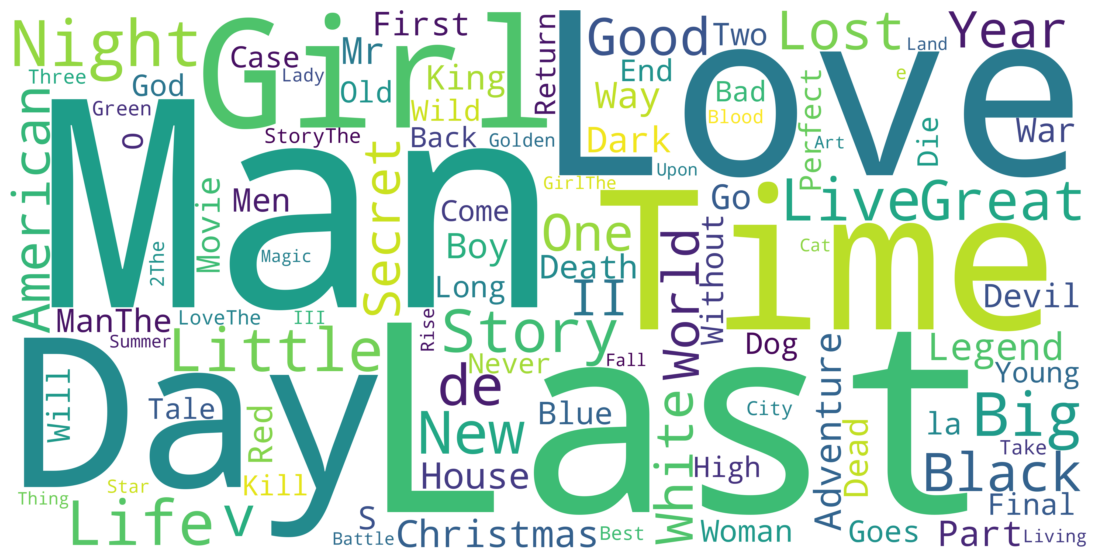

In [ ]:
# title wordcloud
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 100).generate(title_corpus)
plt.figure(figsize = (15,7))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis("off")

(-0.5, 3999.5, 1999.5, -0.5)

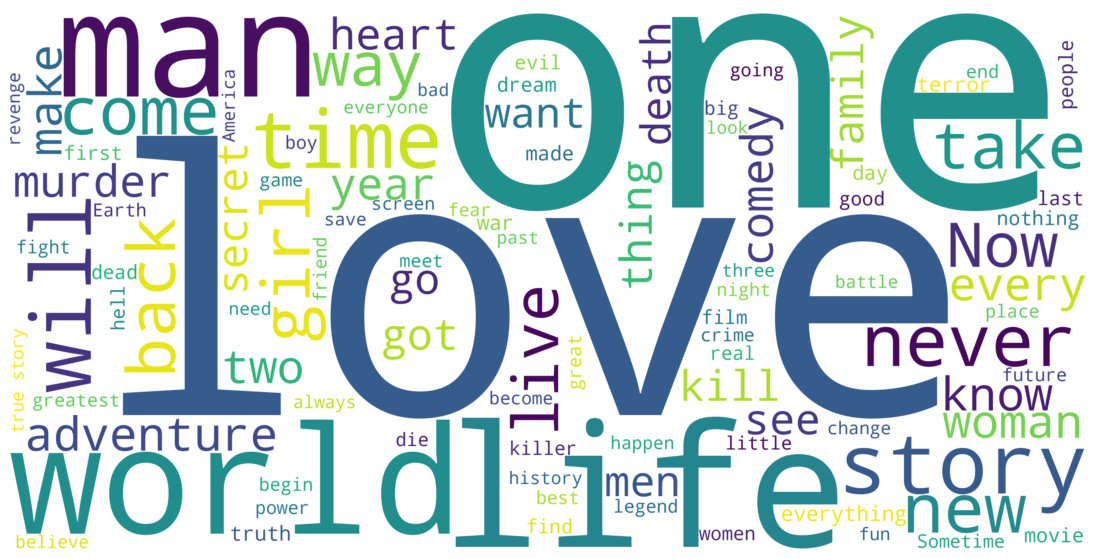

In [ ]:
# tagline wordcloud
tagline_wordcloud = WordCloud(background_color = 'white', height=2000, width=4000, max_words= 100).generate(tagline_corpus)
plt.figure(figsize = (15,7))
plt.imshow(tagline_wordcloud, interpolation = "bilinear")
plt.axis("off")

# Are Franchises More Successful Compared To Non-Franchise Movies?

In [132]:
df["belongs_to_collection"].unique()

array(['Toy Story Collection', nan, 'Grumpy Old Men Collection', ...,
       'Ducobu Collection', 'Mister Blot Collection',
       'Red Lotus Collection'], dtype=object)

In [133]:
# create new franchise column
df["Franchise"] = df["belongs_to_collection"].notna()
df["Franchise"].value_counts()

False    40239
True      4465
Name: Franchise, dtype: int64

**Franchise vs. Stand-alone: Average Revenue**

In [134]:
df.groupby("Franchise").agg({"revenue_musd": "mean"}).reset_index()

,Franchise,revenue_musd
0,False,44.72
1,True,165.55


**Franchise vs. Stand-alone: Return on Investment**

In [135]:
df["ROI"] = df["revenue_musd"] / df["budget_musd"]

In [138]:
# median because data is not balanced
df.groupby("Franchise").agg({"ROI": "median"}).reset_index()

,Franchise,ROI
0,False,1.62
1,True,3.71


**Franchise vs. Stand-alone: Average budget**

In [ ]:
df.groupby("Franchise").agg({"budget_musd": "mean"}).reset_index()

,Franchise,budget_musd
0,False,18.05
1,True,38.32


**Franchise vs. Stand-alone: Popularity**

In [ ]:
df.groupby("Franchise").agg({"popularity": "mean"}).reset_index()

,Franchise,popularity
0,False,2.59
1,True,6.25


**Franchise vs. Stand-alone: Average Rating**

In [ ]:
df.groupby("Franchise").agg({"vote_average": "mean"}).reset_index()

,Franchise,vote_average
0,False,6.01
1,True,5.96


In [ ]:
# dataframe for all the metrics
df.groupby("Franchise").agg({"budget_musd": "mean", "revenue_musd": "mean", "vote_average": "mean",
                            "popularity": "mean", "ROI":"median", "vote_count":"mean"}).reset_index()
# franchise movies has higher budget,revenue,popularity,vote counts and not bid differnce in average vote

,Franchise,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
0,False,18.05,44.74,6.01,2.59,1.62,78.29
1,True,38.32,165.71,5.96,6.25,3.71,412.39


# What Are The Most Successful Franchises

In [ ]:
# create aggregated dataframe franchises
franchises = df.groupby("belongs_to_collection").agg({"title":"count", "budget_musd": ["sum", "mean"],
                                                      "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean", "popularity": "mean",
                                                      "ROI":"median",
                                                      "vote_count":"mean"})
franchises

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2      130.00 65.00       366.78   
00 Schneider Filmreihe                   1        0.00   NaN         0.00   
08/15 Collection                         1        0.00   NaN         0.00   
100 Girls Collection                     2        0.00   NaN         0.00   
101 Dalmatians (Animated) Collection     2        4.00  4.00       215.88   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1        0.00   NaN         0.00   
Чебурашка и крокодил Гена                1        0.00   NaN         0.00   
Что Творят мужчины! (Коллекция)          2        2.00  2.00         0.00   
男はつらいよ シリーズ                              3        0.00   NaN         0.00   
식객 시리즈                                   2        0.00   NaN         0.00   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
... Has Fallen Collection            183.39         6.00      13.01   2.86   
00 Schneider Filmreihe                  NaN         6.50       1.93    NaN   
08/15 Collection                        NaN         5.90       0.63    NaN   
100 Girls Collection                    NaN         5.15       3.08    NaN   
101 Dalmatians (Animated) Collection 215.88         6.25      13.06  53.97   
...                                     ...          ...        ...    ...   
Сказки Чуковского                       NaN         3.00       0.73    NaN   
Чебурашка и крокодил Гена               NaN         6.70       0.88    NaN   
Что Творят мужчины! (Коллекция)         NaN         3.15       1.30    NaN   
男はつらいよ シリーズ                             NaN         7.00       0.04    NaN   
식객 시리즈                                  NaN         4.95       0.16    NaN   

                                     vote_count  
                                           mean  
belongs_to_collection                            
... Has Fallen Collection               2333.00  
00 Schneider Filmreihe                    16.00  
08/15 Collection                           4.00  
100 Girls Collection                      64.00  
101 Dalmatians (Animated) Collection     937.00  
...                                         ...  
Сказки Чуковского                          3.00  
Чебурашка и крокодил Гена                  7.00  
Что Творят мужчины! (Коллекция)            5.50  
男はつらいよ シリーズ                                0.67  
식객 시리즈                                     3.50  

[1691 rows x 9 columns]

In [ ]:
# top 5 franchises by movie count
franchises.nlargest(5, ("title", "count"))

title budget_musd       revenue_musd         \
                              count         sum  mean          sum   mean   
belongs_to_collection                                                       
The Bowery Boys                  29        0.00   NaN         0.00    NaN   
Totò Collection                  27        0.00   NaN         0.00    NaN   
James Bond Collection            26     1539.65 59.22      7106.97 273.35   
Zatôichi: The Blind Swordsman    26        0.00   NaN         0.00    NaN   
The Carry On Collection          25        0.00   NaN         0.00    NaN   

                              vote_average popularity    ROI vote_count  
                                      mean       mean median       mean  
belongs_to_collection                                                    
The Bowery Boys                       6.67       0.20    NaN       0.72  
Totò Collection                       6.84       1.05    NaN      18.04  
James Bond Collection                 6.34      13.45   6.13    1284.31  
Zatôichi: The Blind Swordsman         6.40       1.10    NaN      11.19  
The Carry On Collection               6.17       3.22    NaN      21.04

In [ ]:
# top 5 franchises by average budget
franchises.nlargest(5, ("budget_musd", "mean"))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
Tangled Collection                      2      260.00 260.00       591.79   
Pirates of the Caribbean Collection     5     1250.00 250.00      4521.58   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Hobbit Collection                   3      750.00 250.00      2935.52   
Man of Steel Collection                 2      475.00 237.50      1536.11   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
Tangled Collection                   591.79         7.25      12.32   2.28   
Pirates of the Caribbean Collection  904.32         6.88      53.97   3.45   
The Avengers Collection             1462.48         7.35      63.63   5.96   
The Hobbit Collection                978.51         7.23      25.21   3.83   
Man of Steel Collection              768.05         6.10      24.99   3.22   

                                    vote_count  
                                          mean  
belongs_to_collection                           
Tangled Collection                     1901.00  
Pirates of the Caribbean Collection    5016.00  
The Avengers Collection                9454.00  
The Hobbit Collection                  5981.33  
Man of Steel Collection                6825.50

In [ ]:
# top 5 franchises by average revenue
franchises.nlargest(5, ("revenue_musd", "mean"))

title budget_musd        revenue_musd          \
                        count         sum   mean          sum    mean   
belongs_to_collection                                                   
Avatar Collection           1      237.00 237.00      2787.97 2787.97   
The Avengers Collection     2      500.00 250.00      2924.96 1462.48   
Frozen Collection           2      150.00 150.00      1274.22 1274.22   
Finding Nemo Collection     2      294.00 147.00      1968.91  984.45   
The Hobbit Collection       3      750.00 250.00      2935.52  978.51   

                        vote_average popularity    ROI vote_count  
                                mean       mean median       mean  
belongs_to_collection                                              
Avatar Collection               7.20     185.07  11.76   12114.00  
The Avengers Collection         7.35      63.63   5.96    9454.00  
Frozen Collection               7.10      16.88   8.49    3035.00  
Finding Nemo Collection         7.20      19.99   7.57    5312.50  
The Hobbit Collection           7.23      25.21   3.83    5981.33

In [ ]:
# top 5 franchises by median roi
franchises.nlargest(5, ("ROI", "median"))

title budget_musd      revenue_musd  \
                                          count         sum mean          sum   
belongs_to_collection                                                           
Blair Witch Collection                        3        5.06 2.53       293.17   
Super Size Me Collection                      1        0.07 0.07        28.58   
Open Water Collection                         2        1.33 0.67        54.67   
Bambi Collection                              2        0.86 0.86       267.45   
The Hills Have Eyes (Original) Collection     2        0.93 0.46        25.00   

                                                 vote_average popularity  \
                                            mean         mean       mean   
belongs_to_collection                                                      
Blair Witch Collection                    146.59         5.17      10.51   
Super Size Me Collection                   28.58         6.60       5.27   
Open Water Collection                      54.67         5.25      11.08   
Bambi Collection                          267.45         6.40      10.74   
The Hills Have Eyes (Original) Collection  25.00         5.20       3.94   

                                              ROI vote_count  
                                           median       mean  
belongs_to_collection                                         
Blair Witch Collection                    2071.18     632.00  
Super Size Me Collection                   439.62     520.00  
Open Water Collection                      420.52     238.50  
Bambi Collection                           311.71     824.50  
The Hills Have Eyes (Original) Collection  108.70      89.00

In [ ]:
# top 10 franchises by average vote & vote count>=20000
franchises[franchises[("vote_count", "mean")] >=2000].nlargest(10, ("vote_average", "mean"))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
The Godfather Collection                3       73.00  24.33       429.38   
Blade Runner Collection                 1       28.00  28.00        33.14   
The Dark Knight Collection              3      585.00 195.00      2463.72   
Guardians of the Galaxy Collection      2      370.00 185.00      1636.74   
Kill Bill Collection                    2       60.00  30.00       333.11   
Kingsman Collection                     1       81.00  81.00       414.35   
How to Train Your Dragon Collection     2      310.00 155.00      1104.00   
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Toy Story Collection                    3      320.00 106.67      1937.89   

                                           vote_average popularity    ROI  \
                                      mean         mean       mean median   
belongs_to_collection                                                       
The Lord of the Rings Collection    972.18         8.03      30.27  11.73   
The Godfather Collection            143.13         7.97      31.64   3.66   
Blade Runner Collection              33.14         7.90      96.27   1.18   
The Dark Knight Collection          821.24         7.80      57.42   4.34   
Guardians of the Galaxy Collection  818.37         7.75     119.31   4.43   
Kill Bill Collection                166.55         7.70      23.40   5.55   
Kingsman Collection                 414.35         7.60      28.22   5.12   
How to Train Your Dragon Collection 552.00         7.55      13.34   3.60   
Harry Potter Collection             963.42         7.54      26.25   6.17   
Toy Story Collection                645.96         7.53      18.82   5.53   

                                    vote_count  
                                          mean  
belongs_to_collection                           
The Lord of the Rings Collection       8253.00  
The Godfather Collection               3677.00  
Blade Runner Collection                3833.00  
The Dark Knight Collection             9681.00  
Guardians of the Galaxy Collection     7436.00  
Kill Bill Collection                   4576.00  
Kingsman Collection                    6069.00  
How to Train Your Dragon Collection    3741.00  
Harry Potter Collection                5983.25  
Toy Story Collection                   4679.67

# Who Are The Most Successful Directors

In [143]:
active_directors  = df["diretor"].value_counts().head(10)

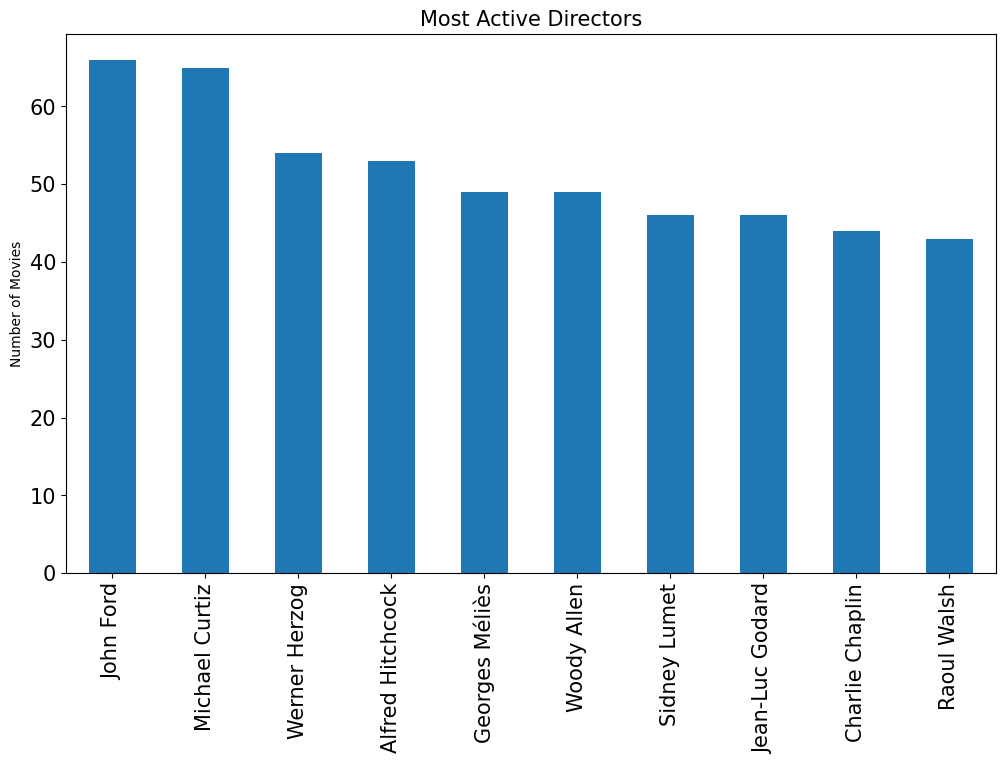

In [144]:
plt.figure(figsize=(12,7))
active_directors.plot(kind = 'bar', fontsize = 15)
plt.title("Most Active Directors", fontsize = 15)
plt.ylabel("Number of Movies", fontsize = 10)
plt.show()

In [145]:
top_directors_revenue = df.groupby("diretor").agg({"revenue_musd":"sum"}).nlargest(10, "revenue_musd")

<Figure size 1200x700 with 0 Axes>

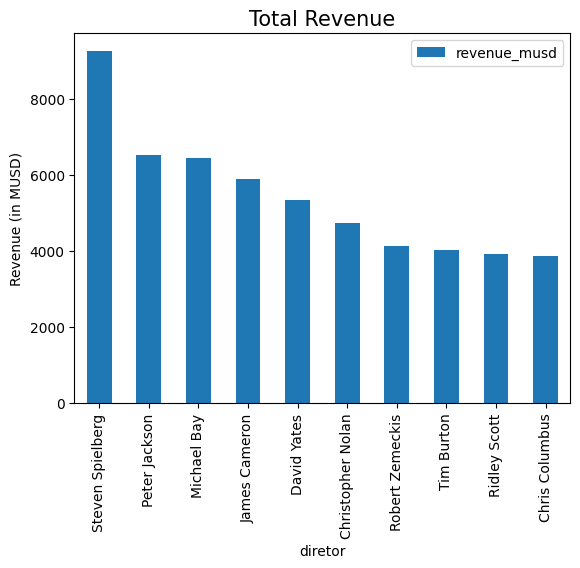

In [146]:
plt.figure(figsize=(12,7))
top_directors_revenue.plot(kind = 'bar')
plt.title("Total Revenue",fontsize = 15)
plt.ylabel("Revenue (in MUSD)", fontsize = 10)
plt.show()

In [147]:
directors = df.groupby("diretor").agg({"title": "count", "vote_average" :"mean", "vote_count": "sum"})

In [148]:
directors

,title,vote_average,vote_count
diretor,,,
Dale Trevillion\t,2,4.00,4.00
Davide Manuli,1,6.90,10.00
E.W. Swackhamer,1,5.90,5.00
Vitaliy Vorobyov,1,5.50,3.00
Yeon Sang-Ho,4,6.60,1039.00
...,...,...,...
Ярополк Лапшин,1,10.00,1.00
پیمان معادی,1,6.00,2.00
塩谷 直義,1,7.20,40.00


In [149]:
directors[(directors["vote_count"] >= 1000) & (directors["vote_average"] >= 6)].nlargest(10, "vote_average")

,title,vote_average,vote_count
diretor,,,
Garth Davis,1,8.00,1699.00
Tony Kaye,3,7.87,3474.00
Hayao Miyazaki,14,7.70,14700.00
Stephen Chbosky,1,7.70,3056.00
Sergio Leone,7,7.66,6737.00
Jan Pinkava,2,7.65,4819.00
Christopher Nolan,11,7.62,67344.00
Alex Garland,1,7.60,4862.00
Dan Gilroy,1,7.60,3475.00


In [150]:
df["genres"] = df["genres"].astype(str)
df["genres"]

0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
44699                Drama|Family
44700                       Drama
44701       Action|Drama|Thriller
44702                         nan
44703                         nan
Name: genres, Length: 44704, dtype: object

In [151]:
mask_genres = df["genres"].str.contains("Horror")
mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
44699    False
44700    False
44701    False
44702    False
44703    False
Name: genres, Length: 44704, dtype: bool

In [152]:
# select top 10 successful horror directors
df.loc[mask_genres].groupby("diretor").agg({"revenue_musd":"sum"}).nlargest(10, "revenue_musd")

,revenue_musd
diretor,
Paul W.S. Anderson,982.29
James Wan,861.31
Wes Craven,834.93
Francis Lawrence,816.23
Ridley Scott,689.00
Marc Forster,531.87
Steven Spielberg,500.10
William Friedkin,466.40
Darren Lynn Bousman,456.34


# Who Are The Most Successful Actors

In [154]:
df["cast"].str.split("|")

id
862       [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
8844      [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
15602     [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
31357     [Whitney Houston, Angela Bassett, Loretta Devi...
11862     [Steve Martin, Diane Keaton, Martin Short, Kim...
                                ...                        
439050          [Leila Hatami, Kourosh Tahami, Elham Korda]
111109    [Angel Aquino, Perry Dizon, Hazel Orencio, Joe...
67758     [Erika Eleniak, Adam Baldwin, Julie du Page, J...
227506    [Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...
461257                                                  NaN
Name: cast, Length: 44704, dtype: object

In [159]:
actor_df = df["cast"].str.split("|", expand = True)
actor_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,R. Lee Ermey,Sarah Freeman,Penn Jillette,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,James Handy,Gillian Barber,Brandon Obray,Cyrus Thiedeke,Gary Joseph Thorup,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,Eugene Levy,Lori Alan,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
111109,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,Modesta,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
67758,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,Joe Sabatino,Kiko Ellsworth,Don Swayze,Peter Dobson,Darrell Dubovsky,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [156]:
actor_df.stack()

id       
862     0            Tom Hanks
        1            Tim Allen
        2          Don Rickles
        3           Jim Varney
        4        Wallace Shawn
                   ...        
227506  0     Iwan Mosschuchin
        1    Nathalie Lissenko
        2         Pavel Pavlov
        3    Aleksandr Chabrov
        4          Vera Orlova
Length: 557835, dtype: object

In [168]:
actor_df.stack().reset_index(level =1, drop = True)

id
862               Tom Hanks
862               Tim Allen
862             Don Rickles
862              Jim Varney
862           Wallace Shawn
                ...        
227506     Iwan Mosschuchin
227506    Nathalie Lissenko
227506         Pavel Pavlov
227506    Aleksandr Chabrov
227506          Vera Orlova
Length: 557835, dtype: object

In [169]:
actor_df = actor_df.stack().reset_index(level = 1, drop = True).to_frame()

In [170]:
actor_df

,0
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [171]:
# rename column from 0 to actor
actor_df.columns = ["actor"]
actor_df

,actor
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [172]:
actor_df = actor_df.merge(df[["title", "revenue_musd", "vote_average", "popularity"]],
                how = "left", left_index = True, right_index = True)

In [173]:
actor_df

,actor,title,revenue_musd,vote_average,popularity
id,,,,,
2,Turo Pajala,Ariel,NaN,7.10,3.86
2,Susanna Haavisto,Ariel,NaN,7.10,3.86
2,Matti Pellonpää,Ariel,NaN,7.10,3.86
2,Eetu Hilkamo,Ariel,NaN,7.10,3.86
3,Matti Pellonpää,Shadows in Paradise,NaN,7.10,2.29
...,...,...,...,...,...
469172,Vasco Sequeira,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Armanda Bacelar,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Rafael de Sousa,Manuel on the Island of Wonders,NaN,NaN,0.00


In [ ]:
actor_df["actor"].value_counts().head(10)

Bess Flowers         240
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    122
Michael Caine        110
Gérard Depardieu     109
John Carradine       109
Jackie Chan          108
Donald Sutherland    108
Frank Welker         107
Name: actor, dtype: int64

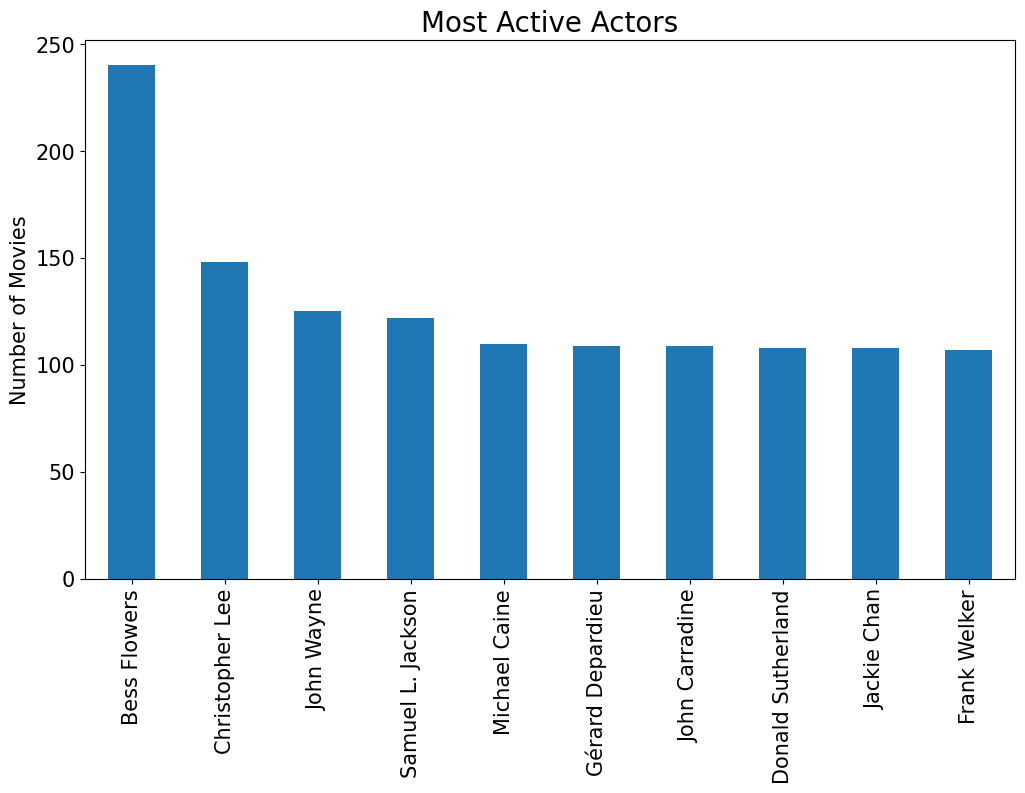

In [174]:
plt.figure(figsize = (12,7))
actor_df["actor"].value_counts().head(10).plot(kind = 'bar', fontsize = 15)
plt.title("Most Active Actors", fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [ ]:
agg = actor_df.groupby("actor").agg(Total_Revenue = ("revenue_musd", "sum"),
                               Mean_Revenue = ("revenue_musd", "mean"),
                               Mean_Rating = ("vote_average", "mean"),
                               Mean_Pop = ("popularity", "mean"),
                               Total_Movies = ("actor", "count"))

In [ ]:
# top 10 actors with by number of movies
agg.nlargest(10, "Total_Movies")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
actor,,,,,
Bess Flowers,368.91,14.76,6.18,2.03,240
Christopher Lee,9417.05,324.73,5.91,4.75,148
John Wayne,236.09,11.24,5.71,3.09,125
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Michael Caine,8053.40,191.75,6.27,8.27,110
Gérard Depardieu,1247.61,95.97,6.05,3.70,109
John Carradine,255.84,19.68,5.55,2.43,109
Donald Sutherland,5390.77,138.22,6.23,7.00,108
Jackie Chan,4699.19,146.85,6.28,5.86,108


In [ ]:
# top 10 actors with by total revenue
agg.nlargest(10, "Total_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
actor,,,,,
Stan Lee,19414.96,647.17,6.51,29.94,48
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Warwick Davis,13256.03,662.80,6.29,13.09,34
Frank Welker,13044.15,326.10,6.31,9.57,107
John Ratzenberger,12596.13,449.86,6.48,10.96,46
Jess Harnell,12234.61,611.73,6.44,10.92,35
Hugo Weaving,11027.58,459.48,6.47,10.97,40
Ian McKellen,11015.59,478.94,6.35,15.45,44
Johnny Depp,10653.76,217.42,6.44,12.38,69


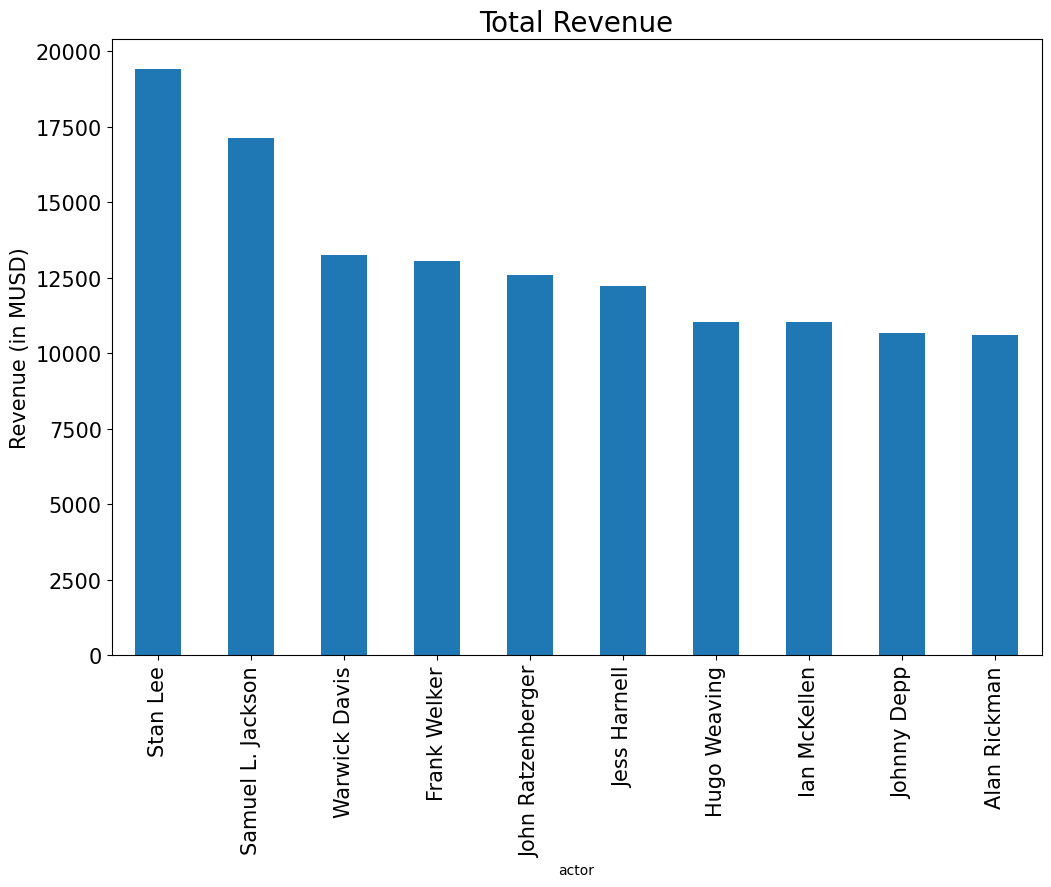

In [ ]:
plt.figure(figsize = (12, 8))
agg.Total_Revenue.nlargest(10).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue", fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [ ]:
agg["Mean_Revenue"].nlargest(10)

actor
April Marie Thomas   2787.97
Ashley Jeffery       2787.97
Austin Wilson        2787.97
Brandon Jelkes       2787.97
Bravita A. Threatt   2787.97
Carvon Futrell       2787.97
Chris Mala           2787.97
Christa Oliver       2787.97
Christopher Nolen    2787.97
Colin Bleasdale      2787.97
Name: Mean_Revenue, dtype: float64

In [ ]:
# we are not sure if the actor is the main actor or just a supporter
actor_df[actor_df["actor"] == "April Marie Thomas"]

,actor,title,revenue_musd,vote_average,popularity
id,,,,,
19995,April Marie Thomas,Avatar,2787.97,7.20,185.07


In [ ]:
# so we will filter actors who acted more than 15 movies and check mean revenue
agg[agg["Total_Movies"] >= 15].nlargest(5, "Mean_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
actor,,,,,
Gloria Stuart,1845.03,1845.03,6.37,3.48,18
Keith Richards,2967.71,989.24,6.46,5.03,23
Yuri Lowenthal,1708.16,854.08,6.19,19.88,17
Alex Zahara,769.65,769.65,5.96,5.09,17
Mark Williams,6872.09,763.57,6.76,12.36,18


In [ ]:
# filter actors who acted more than 15 movies and check mean rating
agg[agg["Total_Movies"] >= 15].nlargest(5, "Mean_Rating")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
actor,,,,,
Şener Şen,11.07,3.69,7.69,0.91,16
Daisuke Katô,0.42,0.14,7.61,3.43,19
Adile Naşit,0.91,0.46,7.53,0.58,15
Haruko Sugimura,0.00,NaN,7.53,2.16,19
Nobuo Nakamura,0.06,0.06,7.47,3.34,17


In [ ]:
# filter actors who acted more than 15 movies and check mean popularity
agg[agg["Total_Movies"] >= 15].nlargest(5, "Mean_Pop")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
actor,,,,,
Jon Hamm,3449.35,191.63,6.33,39.42,25
Ava Acres,6272.36,482.49,5.99,36.26,21
Emma Watson,9639.20,535.51,6.77,35.97,19
Stan Lee,19414.96,647.17,6.51,29.94,48
Luke Evans,8033.10,502.07,6.30,29.83,18


#What are the most successful/popular genres? Has this changed over time (e.g. 80ths vs. 90ths)?




In [175]:
genres = df['genres'].str.split("|" , expand = True)

In [176]:
genre = genres.stack().reset_index(level =1 ,drop = True).to_frame()
genre.columns = ["genre"]
genre

,genre
id,
862,Animation
862,Comedy
862,Family
8844,Adventure
8844,Fantasy
...,...
67758,Action
67758,Drama
67758,Thriller


In [177]:
gen = genre.merge(df[["title",  "revenue_musd", "vote_average", "popularity"]], how = "left", left_index = True, right_index = True)
gen

,genre,title,revenue_musd,vote_average,popularity
id,,,,,
2,Drama,Ariel,NaN,7.10,3.86
2,Crime,Ariel,NaN,7.10,3.86
3,Drama,Shadows in Paradise,NaN,7.10,2.29
3,Comedy,Shadows in Paradise,NaN,7.10,2.29
5,Crime,Four Rooms,4.30,6.50,9.03
...,...,...,...,...,...
468343,Romance,Silja - nuorena nukkunut,NaN,NaN,0.00
468707,Romance,Thick Lashes of Lauri Mäntyvaara,NaN,8.00,0.35
468707,Comedy,Thick Lashes of Lauri Mäntyvaara,NaN,8.00,0.35


In [178]:
# top 5 genres by average vote
gen.groupby("genre").agg({"vote_average":"mean"}).nlargest(5, "vote_average")

,vote_average
genre,
Documentary,6.66
Animation,6.45
History,6.41
Music,6.33
War,6.29


In [ ]:
# top 5 genres by average revenue
gen.groupby("genre").agg({"revenue_musd":"mean"}).nlargest(5, "revenue_musd")

,revenue_musd
genre,
Adventure,179.19
Animation,176.99
Fantasy,166.01
Family,159.10
Science Fiction,131.52


<Figure size 1200x700 with 0 Axes>

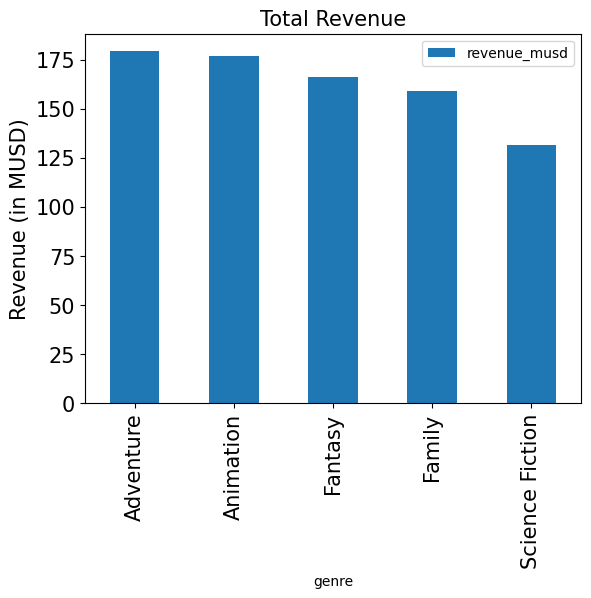

In [ ]:
plt.figure(figsize = (12,7))
gen.groupby("genre").agg({"revenue_musd":"mean"}).nlargest(5, "revenue_musd").plot(kind = 'bar', fontsize=15)
plt.title("Total Revenue", fontsize = 15)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [ ]:
# top 5 genres by average popularity
gen.groupby("genre").agg({"popularity":"mean"}).nlargest(5, "popularity")

,popularity
genre,
Adventure,6.00
Fantasy,5.36
Science Fiction,5.00
Action,4.78
Family,4.77
